# 0. Package

In [1]:
import os
import pandas as pd
import numpy as np
import dask.dataframe as dd

# 1. Import Data

In [2]:
temp0 = pd.read_csv(filepath_or_buffer='archive\deaths\kill_match_stats_final_0.csv')
print('final0 complete')
temp1 = pd.read_csv(filepath_or_buffer='archive\deaths\kill_match_stats_final_1.csv')
print('final1 complete')
temp2 = pd.read_csv(filepath_or_buffer='archive\deaths\kill_match_stats_final_2.csv')
print('final2 complete')
temp3 = pd.read_csv(filepath_or_buffer='archive\deaths\kill_match_stats_final_3.csv')
print('final3 complete')
temp4 = pd.read_csv(filepath_or_buffer='archive\deaths\kill_match_stats_final_3.csv')
print('final4 complete')

temp0 complete
temp1 complete
temp2 complete
temp3 complete
temp4 complete


In [3]:
death = pd.concat([temp0, temp1, temp2, temp3, temp4])

In [4]:
death.shape

(67160951, 12)

In [5]:
death.columns

Index(['killed_by', 'killer_name', 'killer_placement', 'killer_position_x',
       'killer_position_y', 'map', 'match_id', 'time', 'victim_name',
       'victim_placement', 'victim_position_x', 'victim_position_y'],
      dtype='object')

In [15]:
death['victim_placement'].unique()

array([  5.,  33.,  46.,  13.,  47.,  15.,  38.,  43.,  28.,  23.,  nan,
        42.,  30.,  11.,  44.,   7.,  14.,  34.,  26.,  24.,  22.,   2.,
        45.,  18.,  25.,   6.,  32.,  35.,   9.,  36.,   3.,  31.,  41.,
         8.,  27.,  10.,  20.,  40.,  29.,  12.,   4.,  19.,  16.,  17.,
        49.,  37.,  48.,  21.,  39.,  50.,  59.,  86.,  69.,  71.,  79.,
        91.,  87.,  51.,  55.,  88.,  76.,  63.,  57.,  81.,  90.,  85.,
        60.,  66.,  73.,  70.,  80.,  53.,  68.,  64.,  72.,  82.,  61.,
        89.,  62.,  56.,  67.,  58.,  83.,  54.,  78.,  52.,  65.,  74.,
        75.,  94.,  92.,  93.,  77.,  84.,   1.,  96.,  95.,  97.,  98.,
        99., 100.])

In [6]:
df1 = death.groupby('killed_by').count()

In [7]:
df1.killer_name.sort_values(ascending=False)

killed_by
Down and Out                       10633444
M416                                7691017
SCAR-L                              6266019
M16A4                               6200510
AKM                                 5729207
UMP9                                3694000
S1897                               2848616
Mini 14                             2054930
Punch                               1767404
Kar98k                              1740111
S686                                1646310
SKS                                 1552458
S12K                                1494681
Micro UZI                           1341044
Grenade                             1206199
Tommy Gun                            847549
P1911                                754797
P92                                  750298
Hit by Car                           616203
Vector                               390295
Bluezone                             387596
Falling                              323412
Groza                 

In [8]:
death['map'].unique()

array(['MIRAMAR', 'ERANGEL', nan], dtype=object)

In [27]:
er = death[death['map']=='ERANGEL']
mi = death[death['map']=='MIRAMAR']

In [24]:
print(er.killer_position_x.max(),
er.killer_position_x.min(),
er.killer_position_x.median())

810724.7 -19185.75 420245.3


In [41]:
er.loc['killer_position_x']

KeyError: 'killer_position_x'

In [40]:
er.loc['killer_position_x'] = -er.loc['killer_position_x']
er.loc['killer_position_y'] = -er.loc['killer_position_y']
er.loc['victim_position_x'] = -er.loc['victim_position_x']
er.loc['victim_position_y'] = -er.loc['victim_position_y']

KeyError: 'killer_position_x'

In [34]:
er = er[er.killed_by != "Down and Out"]

In [35]:
er

killed_by       killer_name  killer_placement  killer_position_x  \
180          M16A4         Malcolm_x               9.0          -496989.8   
181            AKM            G_Berg               7.0          -460416.7   
182            AKM       Lukesnake17              20.0          -488034.1   
183            SKS          AlooGobi               2.0          -501062.9   
184           M416             Powfa               3.0          -495501.2   
...            ...               ...               ...                ...   
13431239     M16A4       HamoodSpice               8.0          -372943.7   
13431240      M416  PassionateCorker               1.0          -685000.1   
13431241     M16A4          Ghost_M4               6.0          -503920.8   
13431244      S12K     ataozhenshuai               1.0          -336358.8   
13431245   Mini 14         GKLLSDG86               1.0          -697274.6   

          killer_position_y      map  \
180               -312569.7  ERANGEL   
181               -414748.8  ERANGEL   
182               -347220.3  ERANGEL   
183               -425078.6  ERANGEL   
184               -429826.2  ERANGEL   
...                     ...      ...   
13431239          -403756.8  ERANGEL   
13431240          -461165.3  ERANGEL   
13431241          -351427.0  ERANGEL   
13431244          -160053.6  ERANGEL   
13431245          -461042.7  ERANGEL   

                                                   match_id  time  \
180       2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...  1035   
181       2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...  1422   
182       2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...  1210   
183       2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...  1818   
184       2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...  1766   
...                                                     ...   ...   
13431239  2U4GBNA0Ymn5rAEQyPoNvUPZIifEyyRf0-IQVo0JkUtezY...   678   
13431240  2U4GBNA0Ymn5rAEQyPoNvUPZIifEyyRf0-IQVo0JkUtezY...   105   
13431241  2U4GBNA0Ymn5rAEQyPoNvUPZIifEyyRf0-IQVo0JkUtezY...  1167   
13431244  2U4GBNA0Ymn5rAEQyPoNvUPZIifEyyRf0-IQVo0JkUtezY...   235   
13431245  2U4GBNA0Ymn5rAEQyPoNvUPZIifEyyRf0-IQVo0JkUtezY...   192   

           victim_name  victim_placement  victim_position_x  victim_position_y  
180        LiPoBattery              22.0          -497819.4          -331981.3  
181           cornsour              16.0          -459817.9          -414426.3  
182            Homebrw               9.0          -487444.2          -347651.0  
183              Powfa               3.0          -493043.4          -434458.1  
184          kittykat6               6.0          -495755.7          -438322.0  
...                ...               ...                ...                ...  
13431239       ccg8566              17.0          -373105.8          -403169.9  
13431240      zLanG_GG              25.0          -685048.7          -461422.8  
13431241     meiliulin              10.0          -488680.0          -344243.0  
13431244  fangzongojbk              21.0          -335807.2          -159903.6  
13431245      BoheMiaa              25.0          -702530.4          -463742.6  

[45140554 rows x 12 columns]

In [11]:
mi

killed_by       killer_name  killer_placement  killer_position_x  \
0              Grenade   KrazyPortuguese               5.0          657725.10   
1               SCAR-L  nide2Bxiaojiejie              31.0           93091.37   
2                 S686          Ascholes              43.0          366921.40   
3         Down and Out        Weirdo7777               9.0          472014.20   
4                 M416         Solayuki1               9.0          473357.80   
...                ...               ...               ...                ...   
13431326          M416          6PMGodvV               5.0          438367.90   
13431327        Kar98k          shenluo1               1.0          148180.00   
13431328  Down and Out       Prince-frog               6.0          144058.10   
13431329          S686           ZitDown              31.0          326532.60   
13431330         M16A4          OldEmrys               7.0          177592.30   

          killer_position_y      map  \
0                  146275.2  MIRAMAR   
1                  722236.4  MIRAMAR   
2                  421623.9  MIRAMAR   
3                  313274.8  MIRAMAR   
4                  318340.5  MIRAMAR   
...                     ...      ...   
13431326           281179.6  MIRAMAR   
13431327           442696.3  MIRAMAR   
13431328           467378.5  MIRAMAR   
13431329           349886.8  MIRAMAR   
13431330           284077.2  MIRAMAR   

                                                   match_id  time  \
0         2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...   823   
1         2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...   194   
2         2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...   103   
3         2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...  1018   
4         2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...  1018   
...                                                     ...   ...   
13431326  2U4GBNA0YmnVvsc2yvoqalsVtYH929moYHQq38kEPUuPOo...   345   
13431327  2U4GBNA0YmnVvsc2yvoqalsVtYH929moYHQq38kEPUuPOo...  1432   
13431328  2U4GBNA0YmnVvsc2yvoqalsVtYH929moYHQq38kEPUuPOo...  1432   
13431329  2U4GBNA0YmnVvsc2yvoqalsVtYH929moYHQq38kEPUuPOo...   139   
13431330  2U4GBNA0YmnVvsc2yvoqalsVtYH929moYHQq38kEPUuPOo...   393   

              victim_name  victim_placement  victim_position_x  \
0         KrazyPortuguese               5.0          657725.10   
1             X3evolution              33.0           92238.68   
2                 CtrlZee              46.0          367304.50   
3               BlackDpre              13.0          476645.90   
4                   Vjolt              13.0          473588.50   
...                   ...               ...                ...   
13431326       leo1245412              25.0          438240.10   
13431327         6PMGodvV               5.0          141087.90   
13431328  66zhangguoqiang               5.0          140920.70   
13431329          Nxz-228              43.0          327110.40   
13431330       LD-RNXR123              23.0          181384.20   

          victim_position_y  
0                  146275.2  
1                  723375.1  
2                  421216.1  
3                  316758.4  
4                  318418.8  
...                     ...  
13431326           281651.5  
13431327           463934.5  
13431328           464058.5  
13431329           348467.7  
13431330           276937.0  

[11943043 rows x 12 columns]

In [37]:
df_er_killer = er.iloc[:, 3:5]
df_mi_killer = mi.iloc[:, 3:5]

In [38]:
df_er_victim = er.iloc[:, 10:14]
df_mi_victim = mi.iloc[:, 10:14]


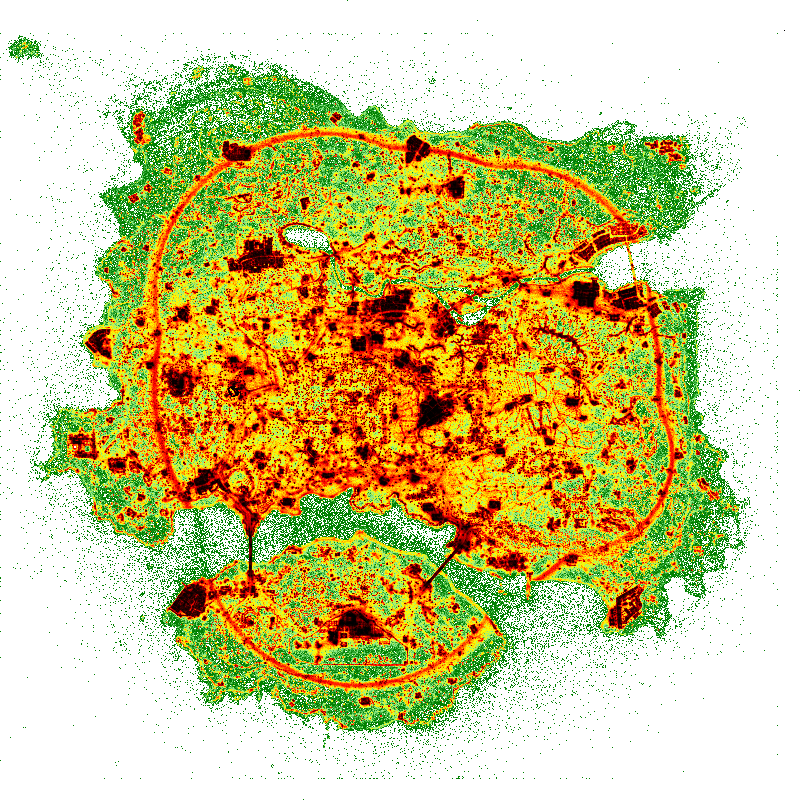

In [39]:
import datashader as ds
import datashader.transfer_functions as tf

cvs = ds.Canvas(plot_width=800, plot_height=800)

# Aggregate the points and render the image
agg = cvs.points(df_er_killer, 'killer_position_x', 'killer_position_y')
img = tf.shade(agg, cmap=["green", "lightgreen", "yellow","orange", "red", 'black'], how='eq_hist')

# Display the image
img

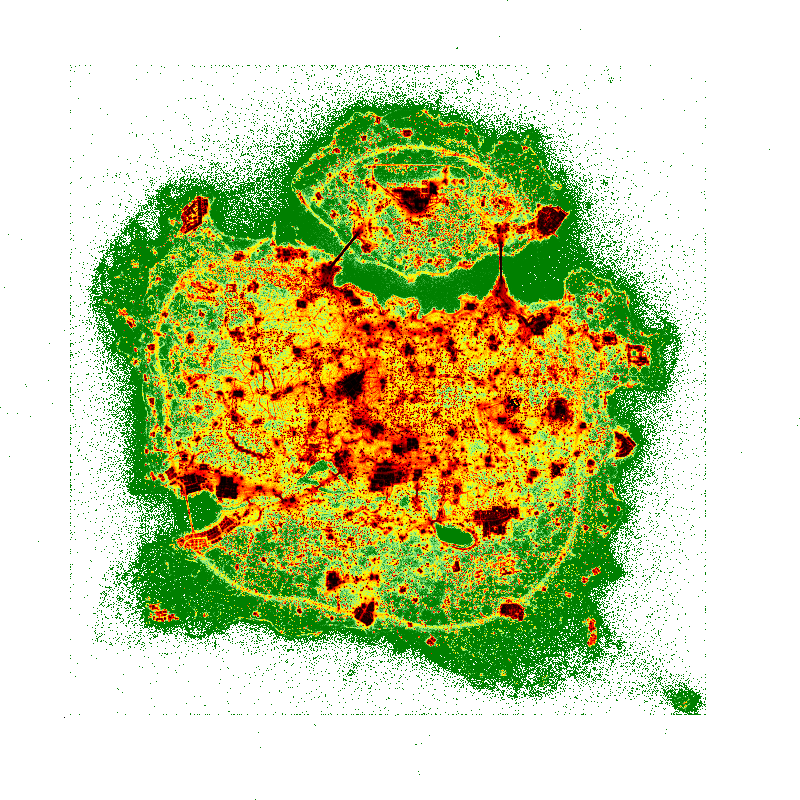

In [ ]:
import datashader as ds
import datashader.transfer_functions as tf

cvs = ds.Canvas(plot_width=800, plot_height=800)

# Aggregate the points and render the image
agg = cvs.points(df_er_victim, 'victim_position_x', 'victim_position_y')
img = tf.shade(agg, cmap=["green", "lightgreen", "yellow","orange", "red", 'black'], how='eq_hist')

# Display the image
img

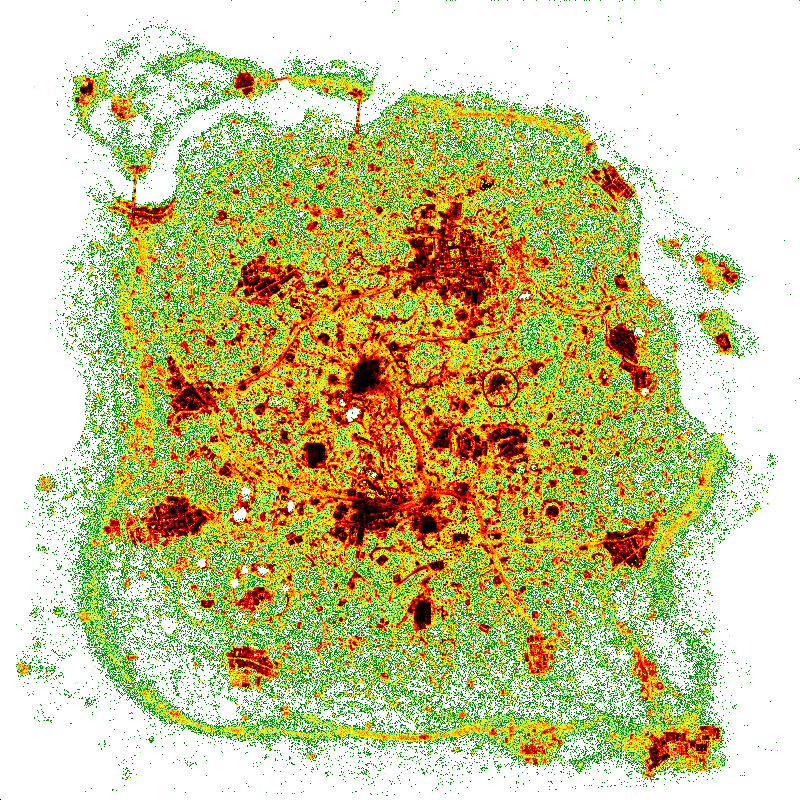

In [ ]:
import datashader as ds
import datashader.transfer_functions as tf

cvs = ds.Canvas(plot_width=800, plot_height=800)

# Aggregate the points and render the image
agg = cvs.points(df_mi_killer, 'killer_position_x', 'killer_position_y')
img = tf.shade(agg, cmap=["green", "lightgreen", "yellow","orange", "red", 'black'], how='eq_hist')

# Display the image
img

In [12]:
import pandas as pd
import numpy as np
import datashader as ds
import datashader.transfer_functions as tf
from shapely.geometry import Point
import geopandas as gpd

# 데이터 읽기 (가상의 데이터를 사용하므로 실제 데이터로 대체해야 함)
# df = pd.read_csv("your_data.csv")

# 가상의 데이터 생성
df = df_er

# GeoDataFrame 생성
geometry_killer = [Point(xy) for xy in zip(df['killer_position_x'], df['killer_position_y'])]
geometry_victim = [Point(xy) for xy in zip(df['victim_position_x'], df['victim_position_y'])]

gdf_killer = gpd.GeoDataFrame(df, geometry=geometry_killer)
gdf_victim = gpd.GeoDataFrame(df, geometry=geometry_victim)

# Canvas 생성
cvs_killer = ds.Canvas(plot_width=800, plot_height=800, x_range=(460000, 510000), y_range=(300000, 450000))
cvs_victim = ds.Canvas(plot_width=800, plot_height=800, x_range=(460000, 510000), y_range=(300000, 450000))

# Aggregate 및 시각화
agg_killer = cvs_killer.points(gdf_killer, 'killer_position_x', 'killer_position_y')
agg_victim = cvs_victim.points(gdf_victim, 'victim_position_x', 'victim_position_y')

img_killer = tf.shade(agg_killer, cmap=["red"], how='eq_hist')
img_victim = tf.shade(agg_victim, cmap=["blue"], how='eq_hist')

# Overlay killer와 victim 이미지
final_img = tf.stack(img_killer, img_victim)

# Display the final image
final_img

NameError: name 'df_er' is not defined